# Tutorial 01 - Data Preprocessing

We provide a converter to convert raw datasets into [CommonRoad scenarios](https://commonroad.in.tum.de/scenarios) in `.xml` format. The public converter is available [here](https://commonroad.in.tum.de/dataset-converters). In addition, CommonRoad-RL provides tools (`./commonroad_rl/tools/pickle_scenario`) to convert `.xml` scenarios to `.pickle` format to save loading time for the training. 

This tutorial shows how to utilize the tools to prepare training and testing data for the highD dataset. A similar procedure follows for the inD dataset.

## 0. Preparation
Please follow the README.md to install the CommonRoad-RL package and make sure the followings:
* current path is at `commonroad-rl/commonroad_rl`, i.e. one upper layer to the `tutorials` folder
* interactive python kernel is triggered from the correct environment

In [1]:
from pathlib import Path
from warnings import warn

# Check and set current path
current_path = Path().absolute()
if current_path.name == "tutorials":
    base_path = current_path.parent
elif current_path.name != "commonroad_rl":
    warn("Expected different path: Please ensure that the pwd is at commonroad-rl/commonroad_rl")
else:
    base_path = current_path

%cd $base_path
%pwd

# Check interactive python kernel
import sys
sys.executable

/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/commonroad_rl


'/home/shuaiyi/Downloads/ENTER/envs/commonroad-py39-rl/bin/python'

## 1. Acquire the dataset
To download the whole raw highD dataset, please go to [the highD home page](https://www.highd-dataset.com).

To facilitate the following exercises, we have prepared sample data under `tutorials/data/highd/raw`, where you should see three csv files recording the track information and one jpg file showing the track background.

## 2. Convert raw .csv data to .xml files

Clone and install [dataset-converters](https://gitlab.lrz.de/tum-cps/dataset-converters/-/tree/master) in `commonroad-rl/external/commonroad-io` folder.

In [2]:
io_path = base_path.parent / "external/commonroad-io"
%cd $io_path
!git clone https://gitlab.lrz.de/tum-cps/dataset-converters.git
%cd dataset-converters

!pip install -r requirements.txt 

/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io
fatal: destination path 'dataset-converters' already exists and is not an empty directory.
/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io/dataset-converters


In [3]:
raw_path = base_path / "tutorials/data/highD/raw/"
xml_path = base_path / "tutorials/data/highD/xmls/"
dc_path = base_path.parent / "external/commonroad-io/dataset-converters/"
%cd $dc_path

!python -m src.main highD $raw_path $xml_path --num_time_steps_scenario 1000
# !python -m src.main inD $raw_path $xml_path --num_time_steps_scenario 1000 

/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io/dataset-converters
Processing file /home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/commonroad_rl/tutorials/data/highD/raw/data/03_tracks.csv...
/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io/commonroad/scenario/scenario.py:545: UserWarning: Not a valid scenario ID: DEU_MetaScenarioUpper-0_0_T-1
  warnings.warn("Not a valid scenario ID: " + benchmark_id)
/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io/commonroad/scenario/scenario.py:545: UserWarning: Not a valid scenario ID: DEU_MetaScenarioLower-0_0_T-1
  warnings.warn("Not a valid scenario ID: " + benchmark_id)
/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/external/commonroad-io/dataset-converters/src/highD/highd_to_cr.py:65: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(recording_meta_df.id), i

Now there should be 51 `.xml` files in the output folder `tutorials/data/highd/xmls`.

Note: When converting inD data, make sure to set the flag `--routability_check strict` to ensure that only valid scenarios are converted!

## 3. Validate .xml files against CommonRoad .xsd specification

To check if the converted `.xml` files comply with the CommonRoad scenario format, use the validation tool in `commonroad_rl/tools`.

In [4]:
%cd $base_path
!python -m commonroad_rl.tools.validate_cr -s tools/XML_commonRoad_XSD_2020a.xsd tutorials/data/highD/xmls/*

/home/shuaiyi/Documents/Lab/commonroad/commonroad-rl/commonroad_rl
tutorials/data/highD/xmls/DEU_LocationBLower-3_10_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_11_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_12_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_13_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_14_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_15_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_16_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_17_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_18_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_19_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_1_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_20_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_21_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_22_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_23_T-1.xml
tutorials/data/highD/xmls/DEU_LocationBLower-3_24_T-1.xml
tutori

## 4. Visualize CommonRoad scenarios
There is a visualization tool in `commonroad_rl/tools`, which can be executed by a simple command at the terminal; for example,  
`python -m commonroad_rl.tools.visualize_cr tutorials/data/highD/xmls/DEU_LocationB-3_1_T-1.xml`. 

However, this script does not work for Jupyter notebook because of a backend error. Therefore, we utilize here the `commonroad-io` package. Let's try it with a sample scenario.

/tmp/ipykernel_18616/2492825817.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(25, 10))


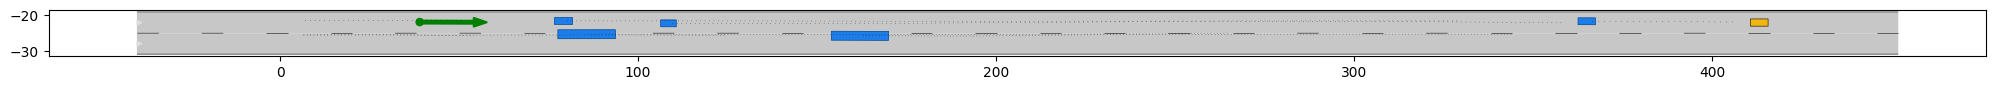

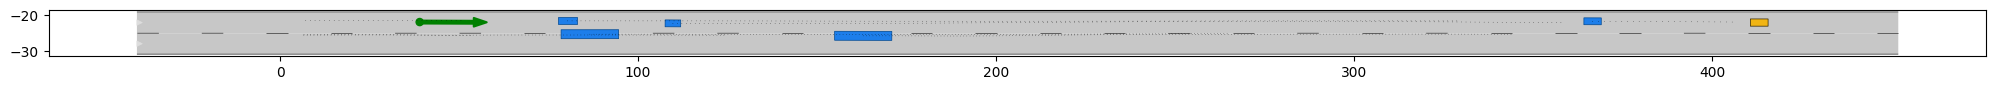

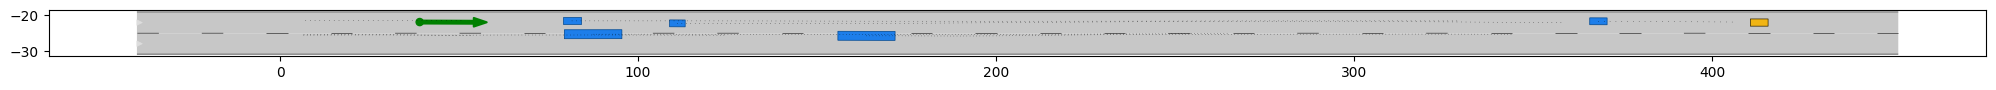

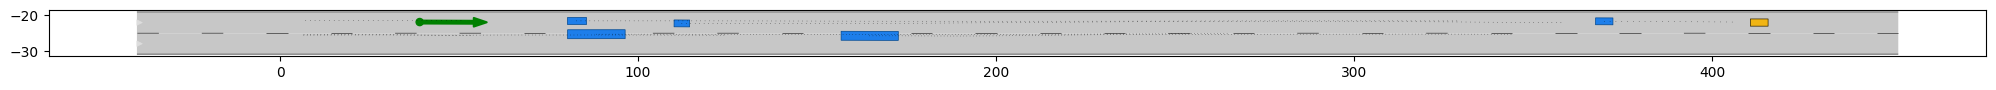

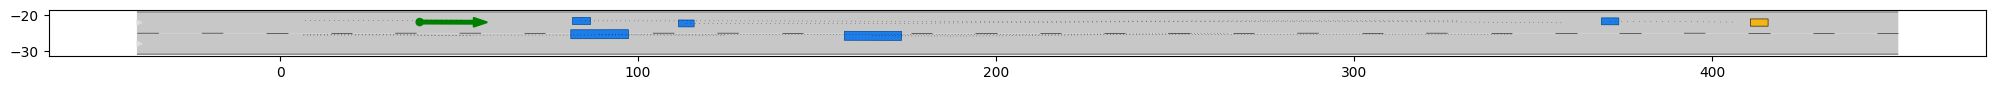

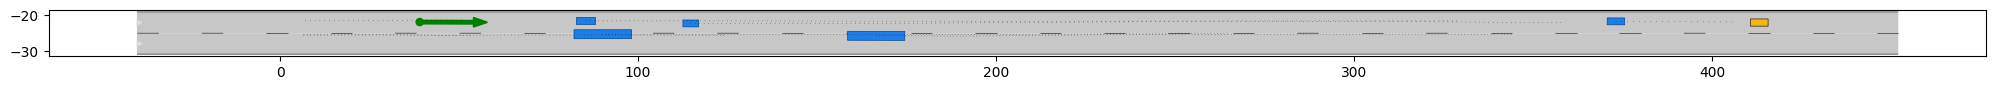

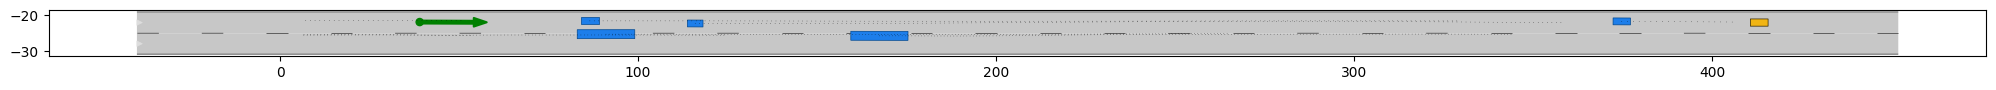

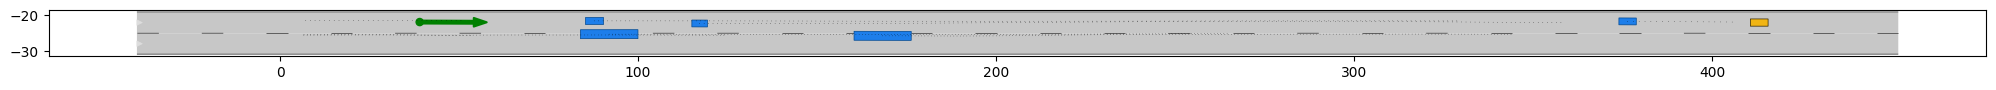

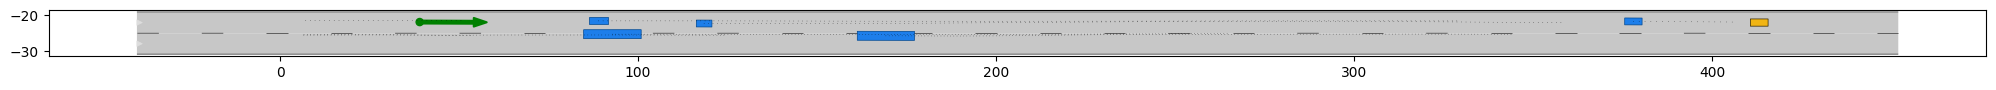

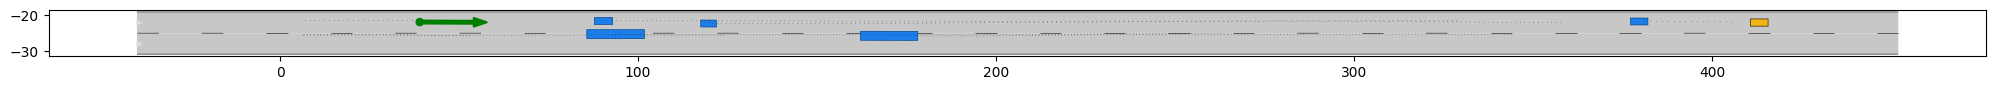

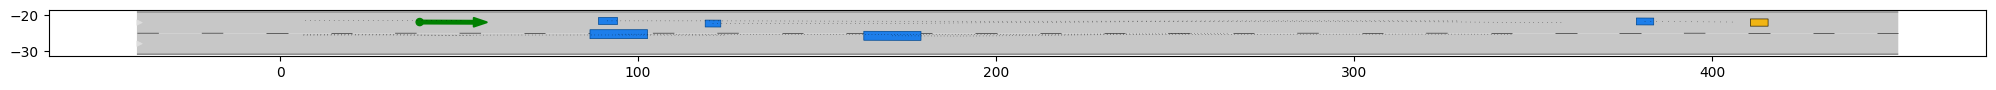

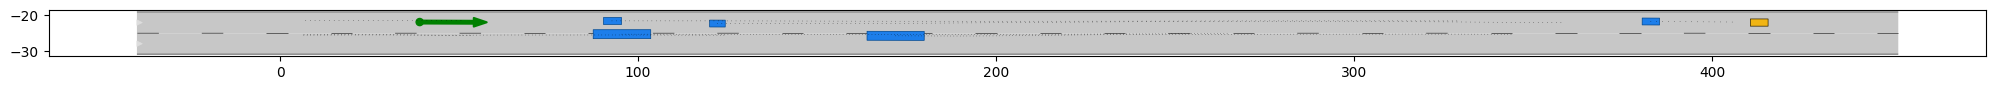

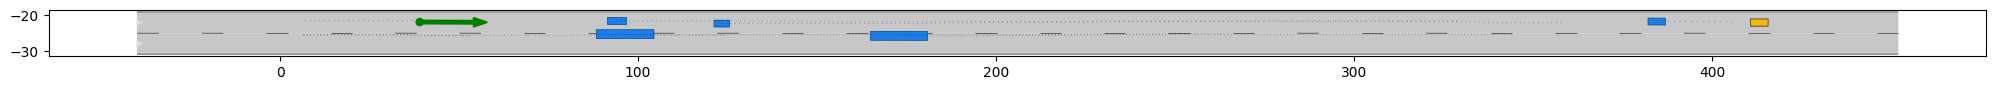

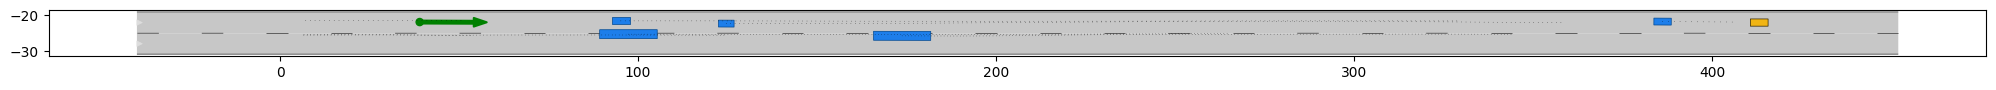

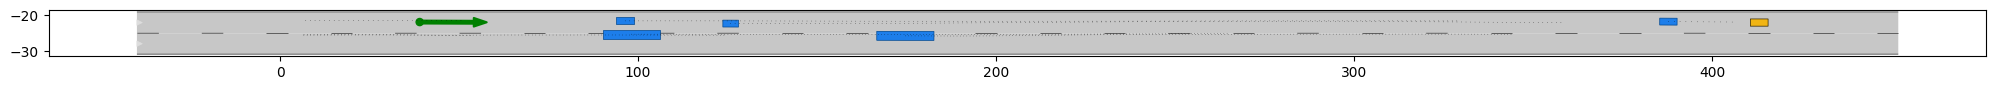

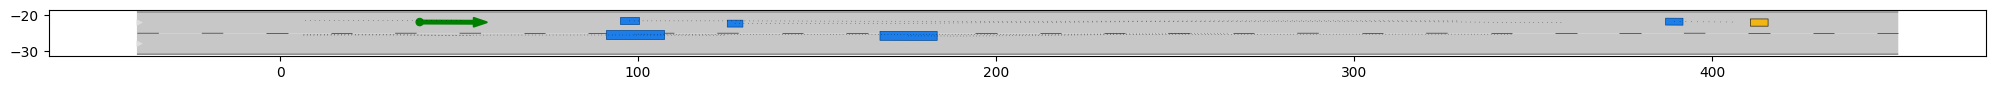

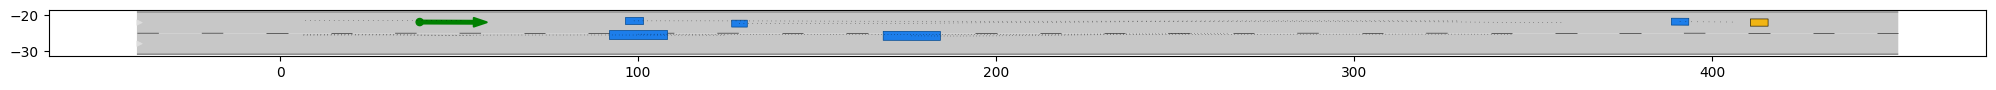

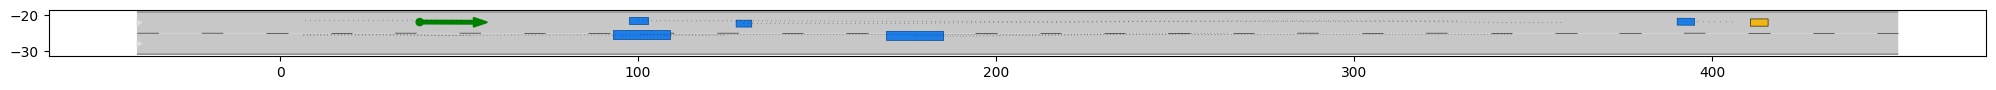

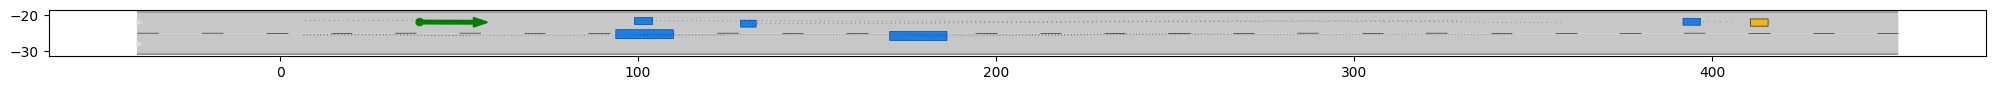

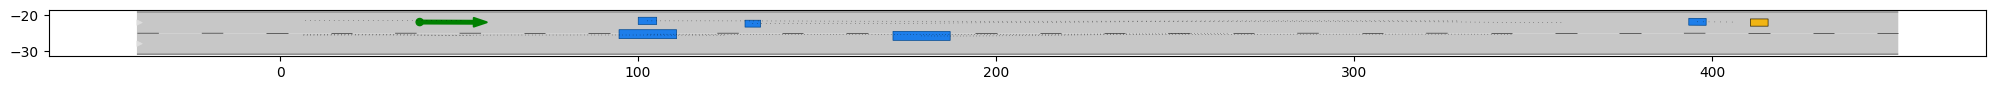

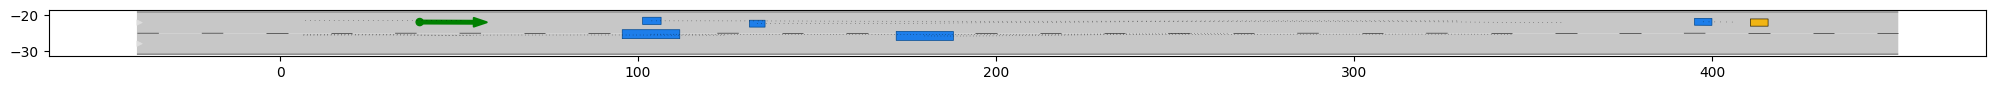

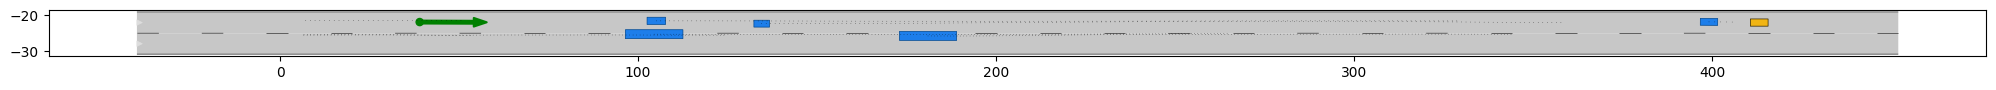

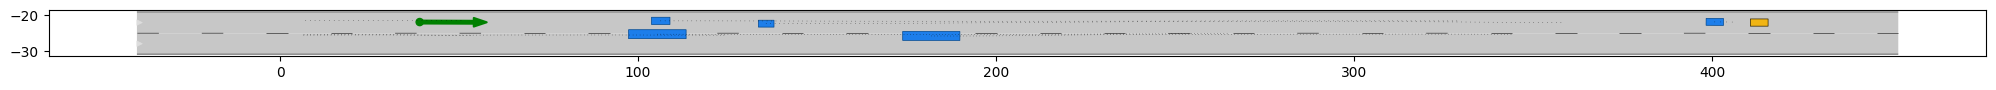

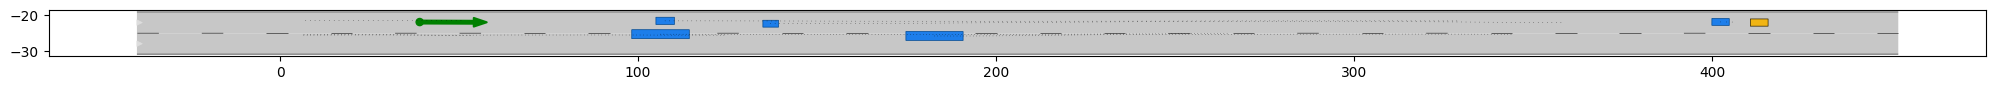

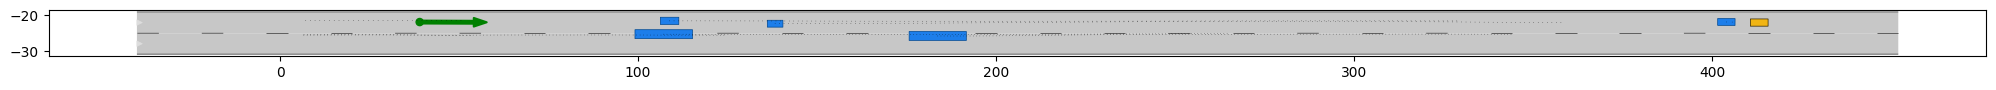

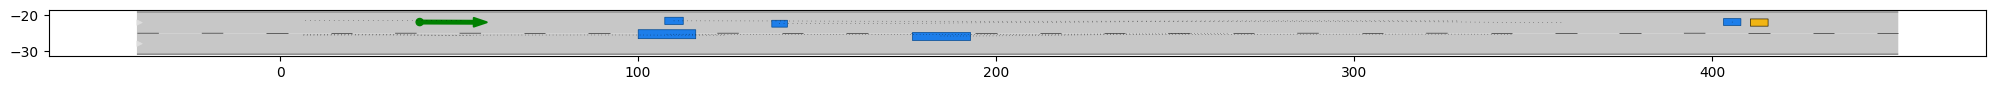

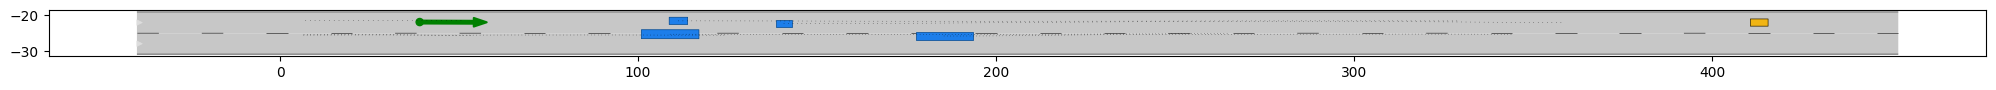

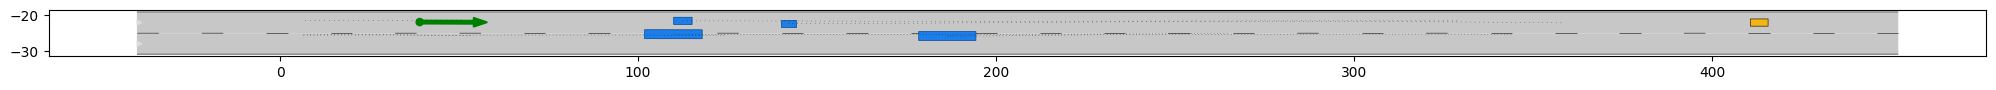

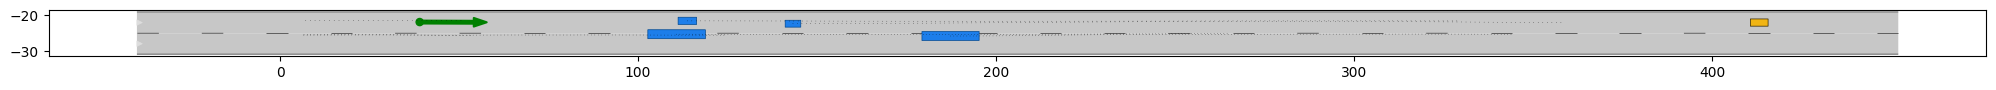

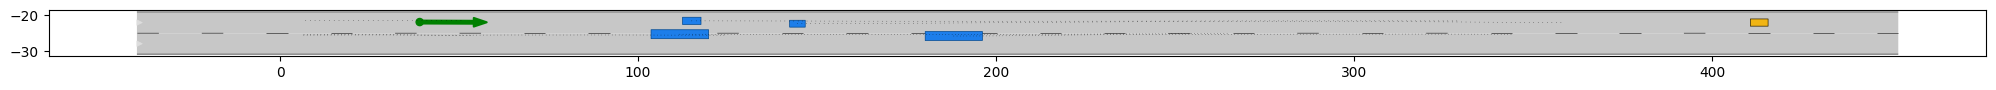

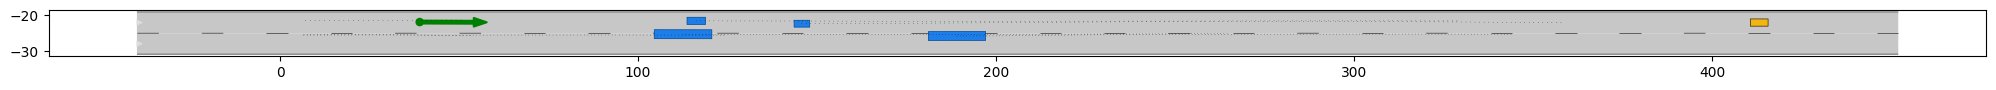

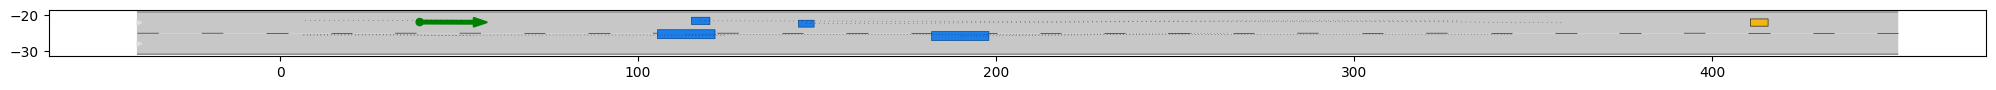

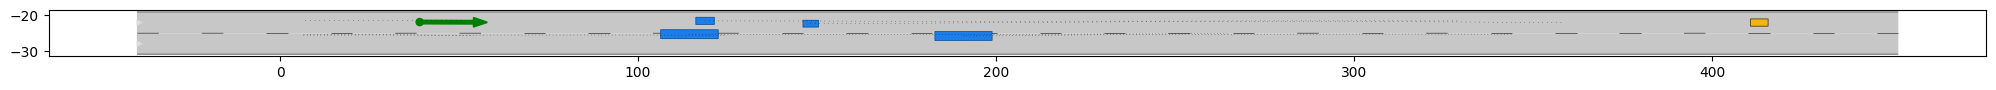

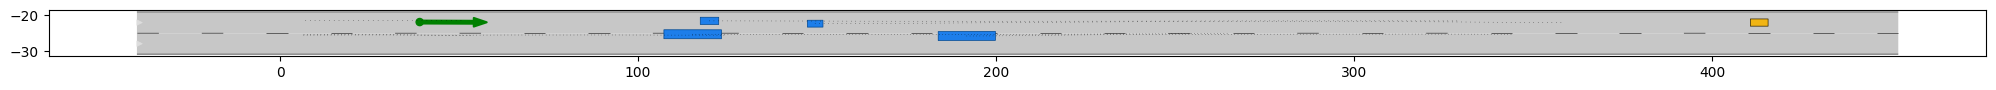

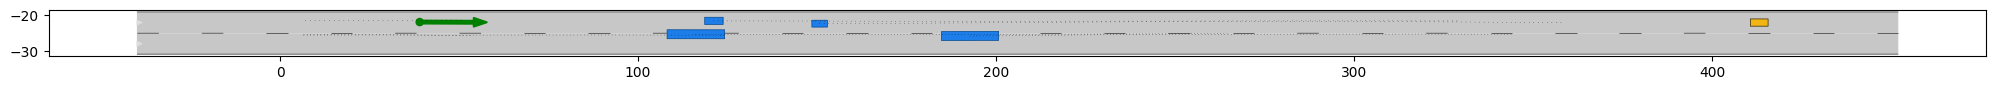

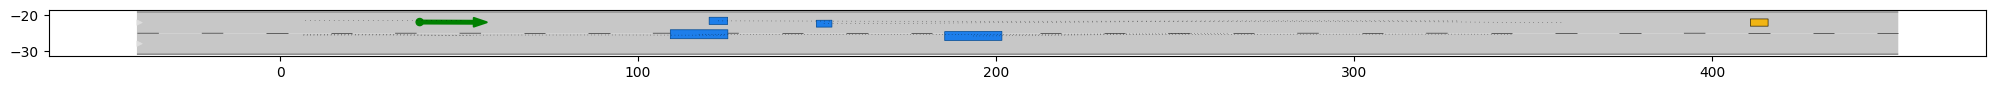

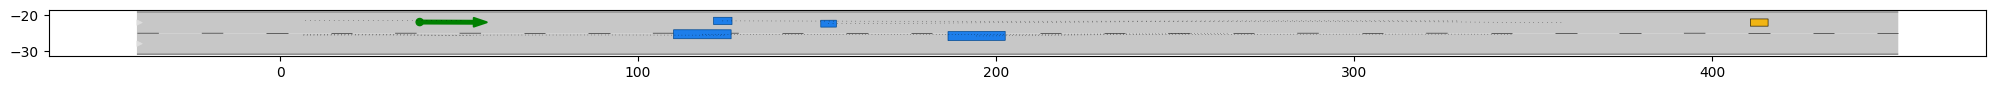

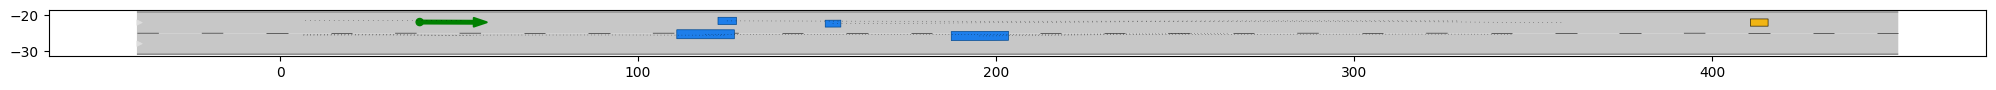

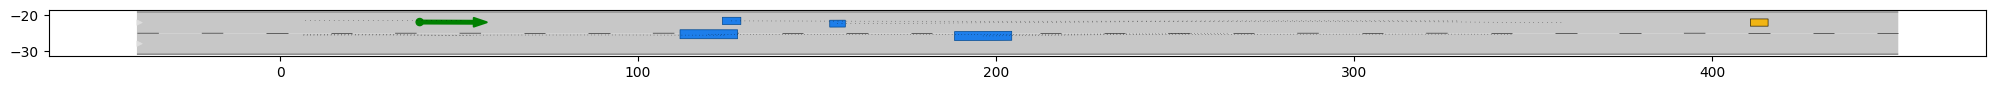

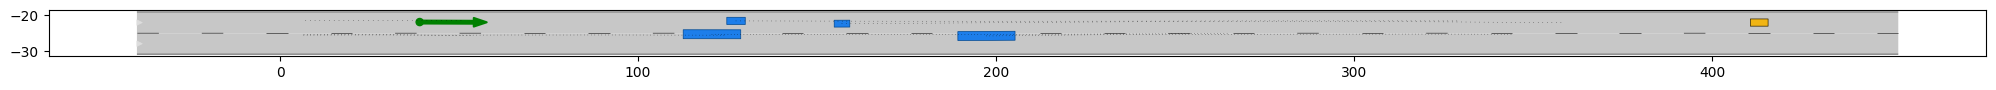

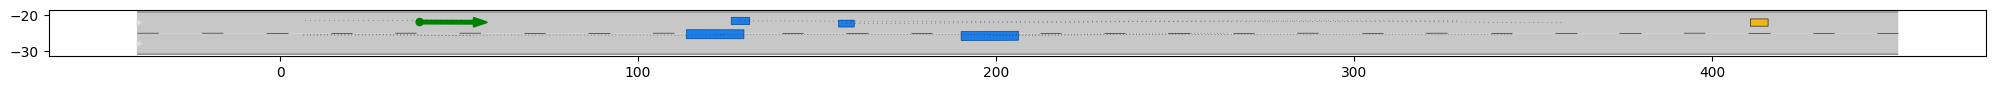

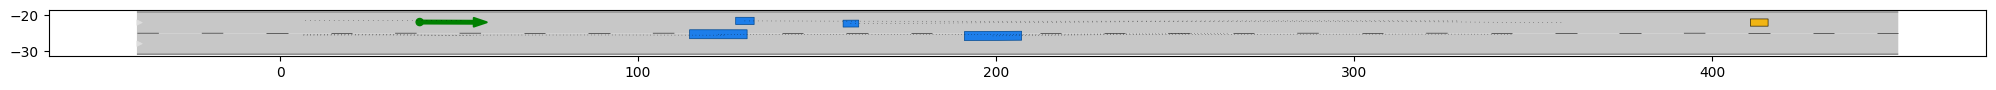

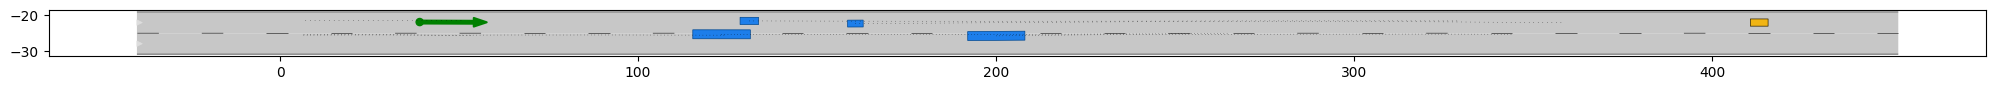

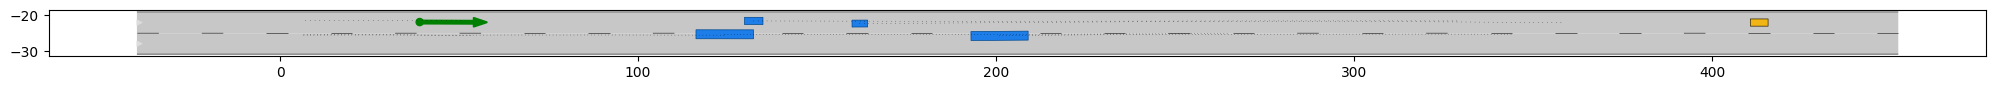

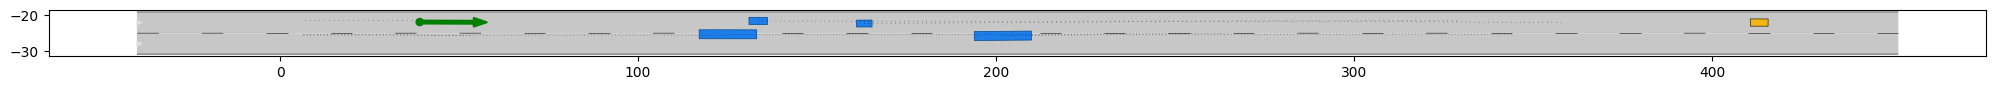

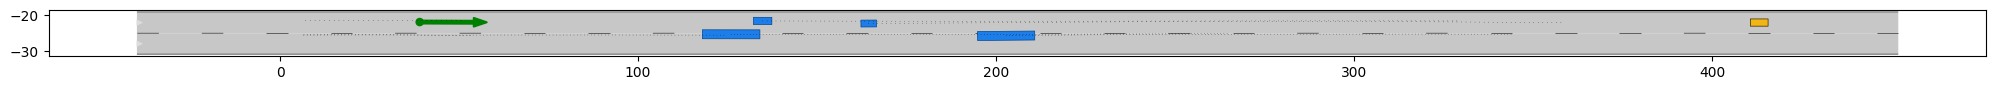

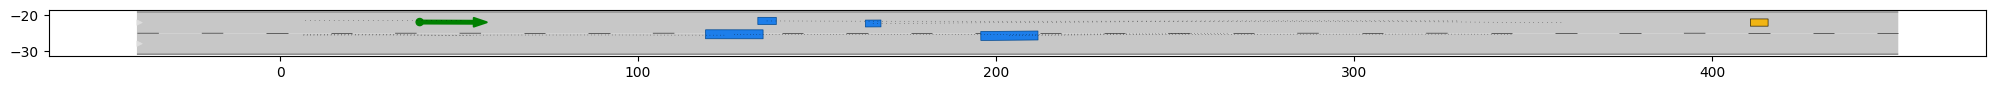

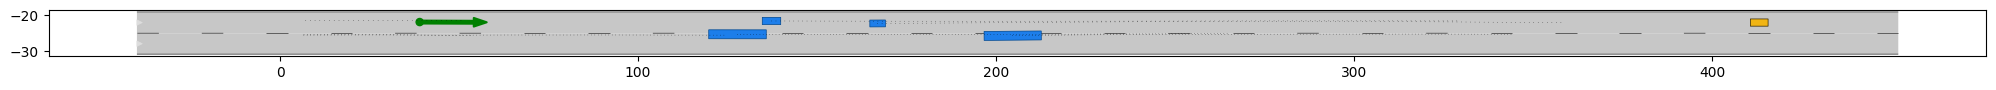

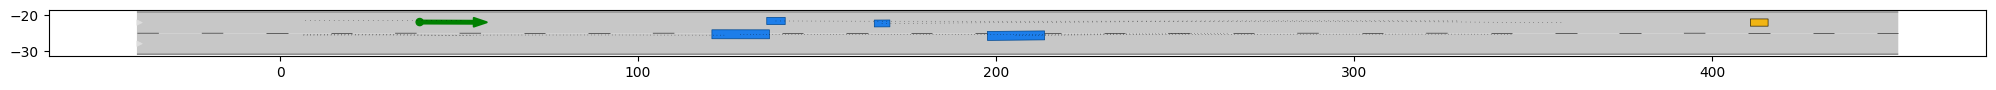

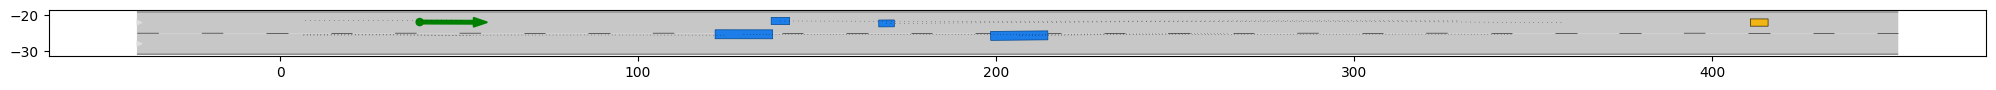

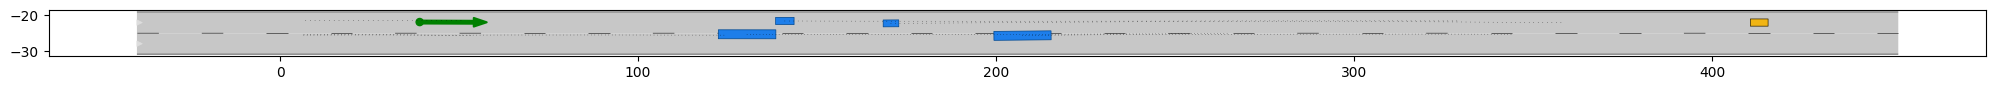

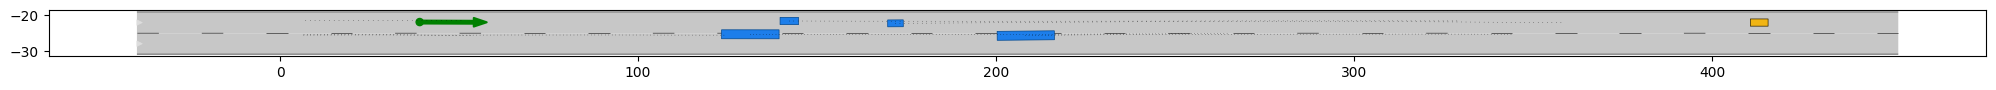

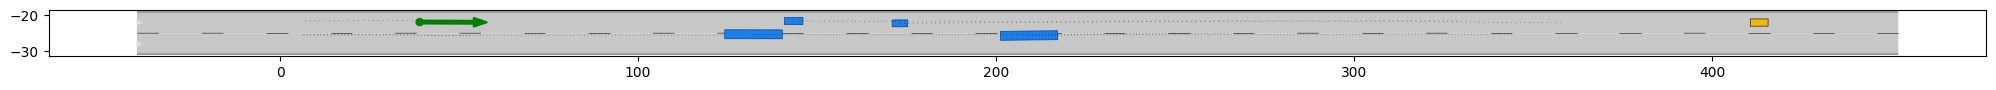

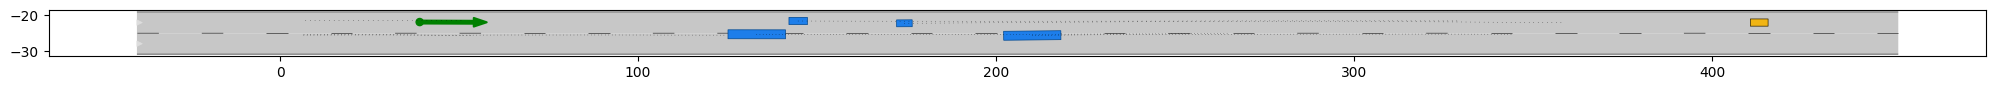

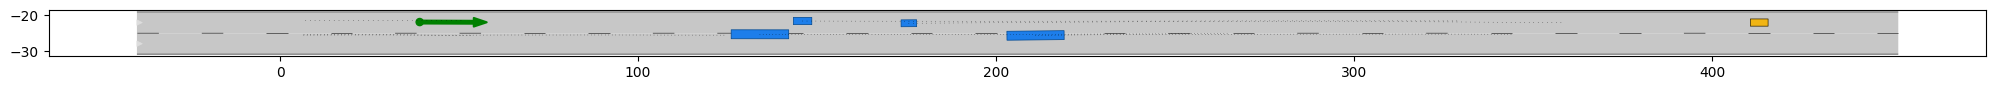

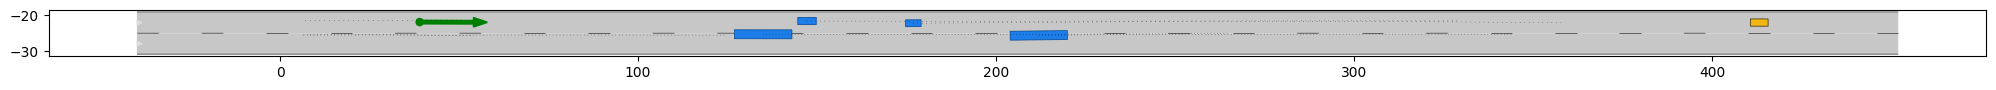

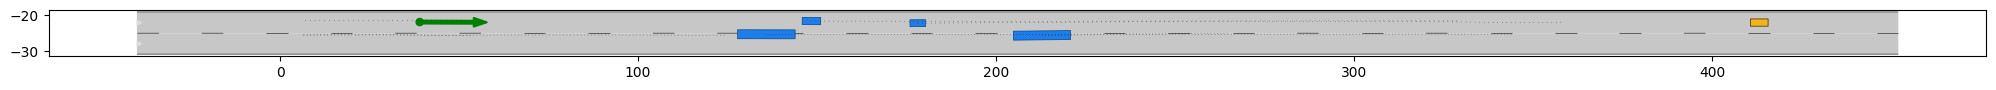

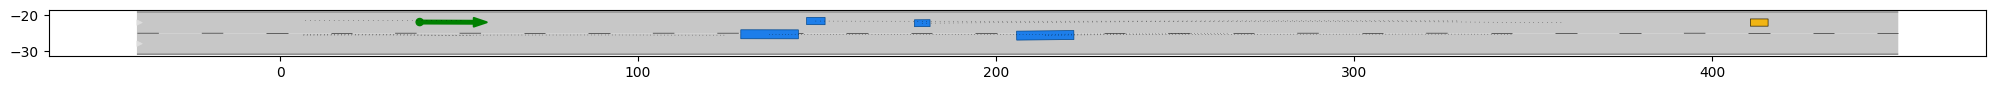

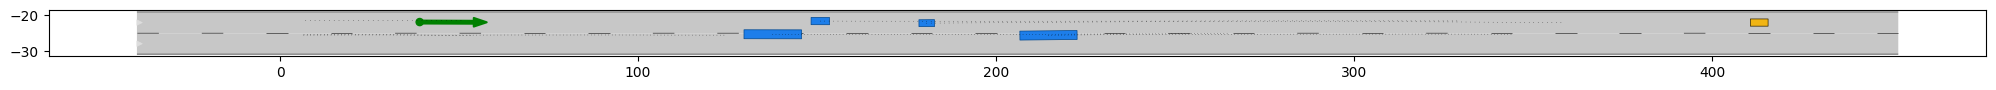

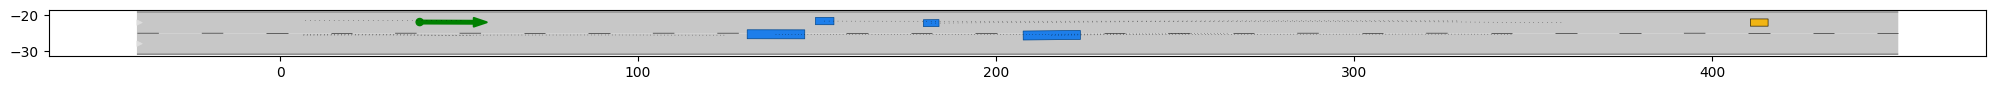

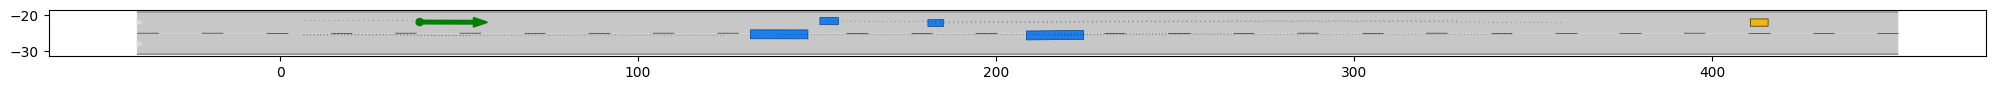

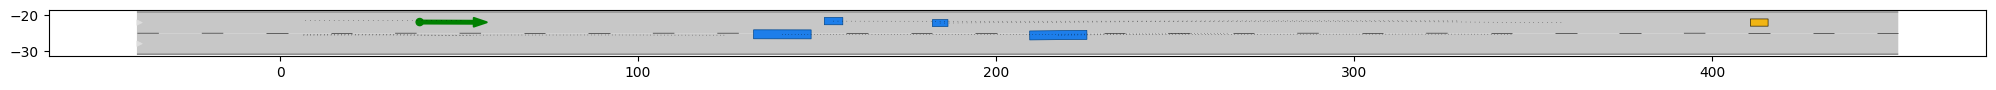

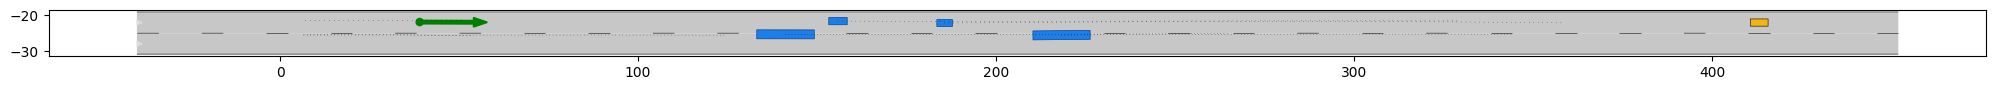

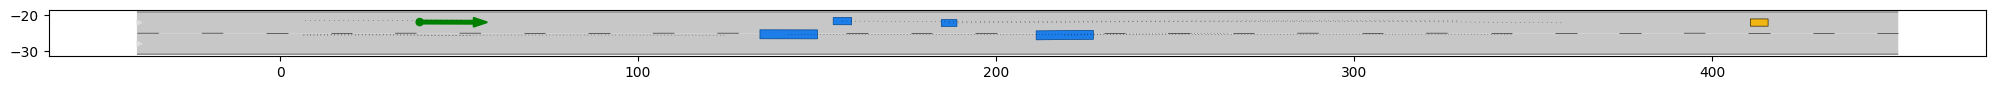

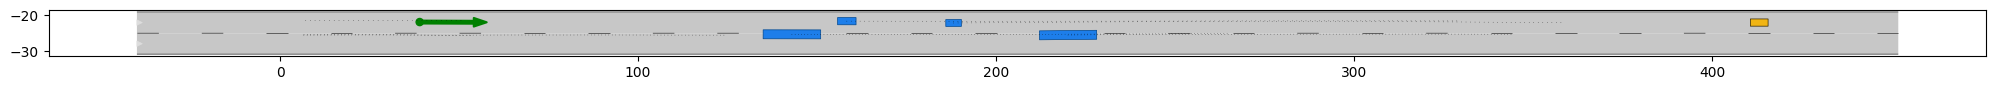

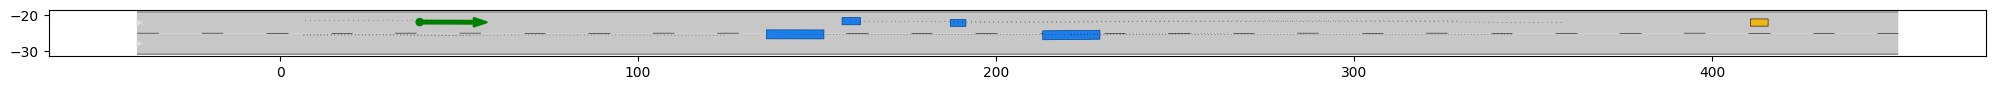

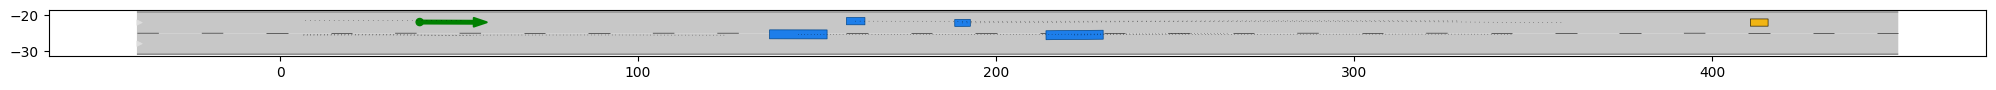

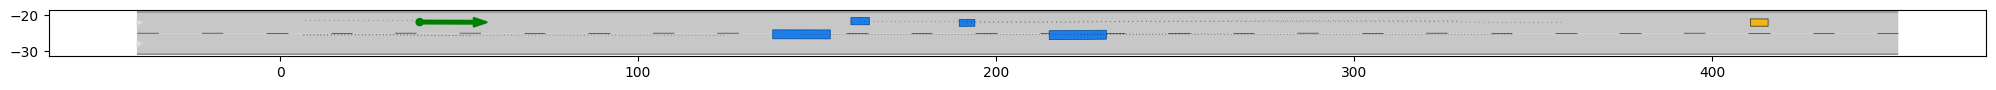

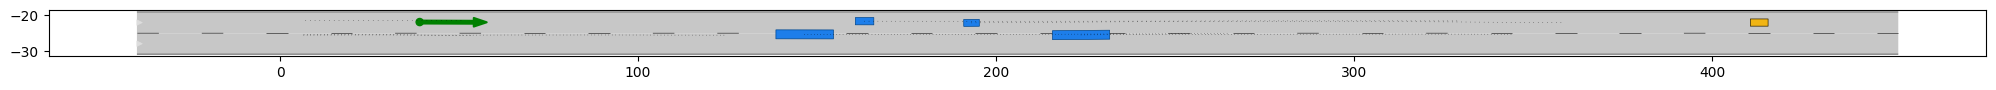

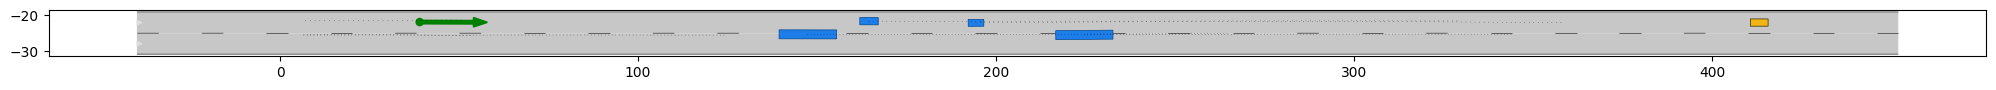

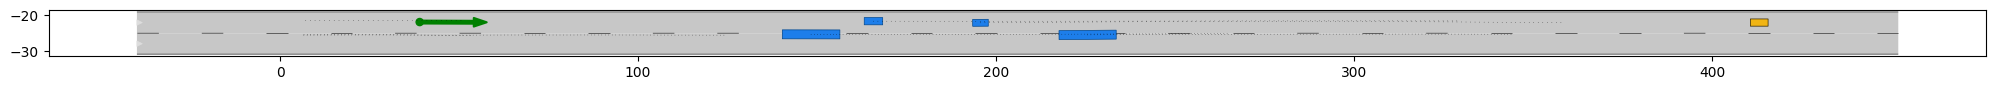

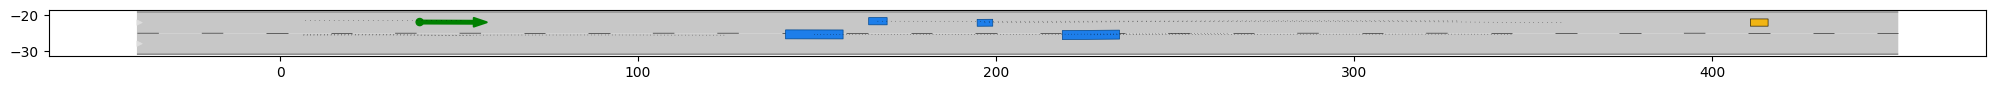

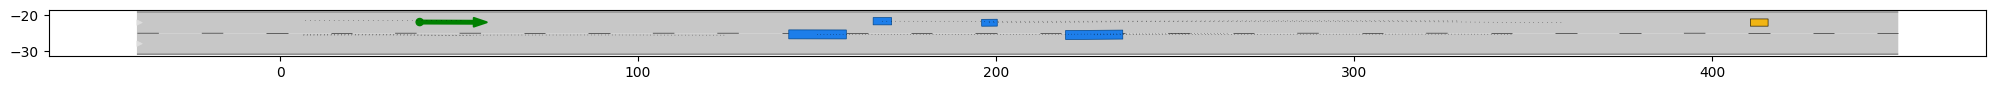

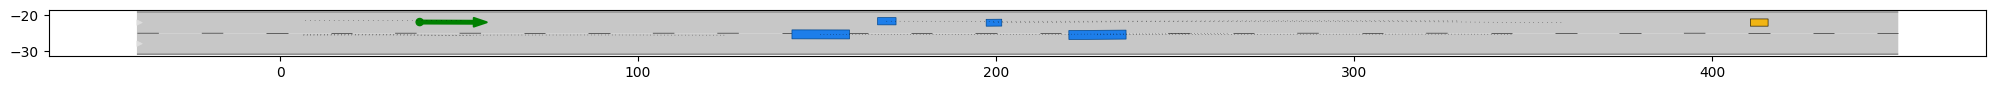

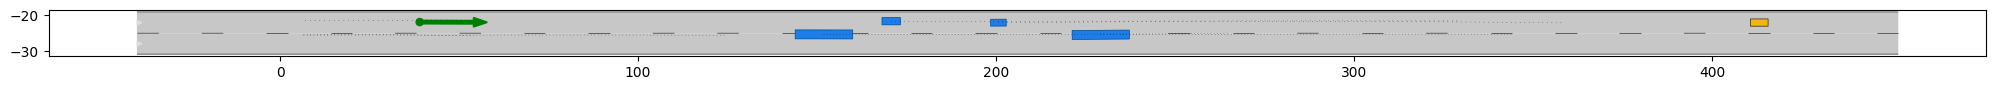

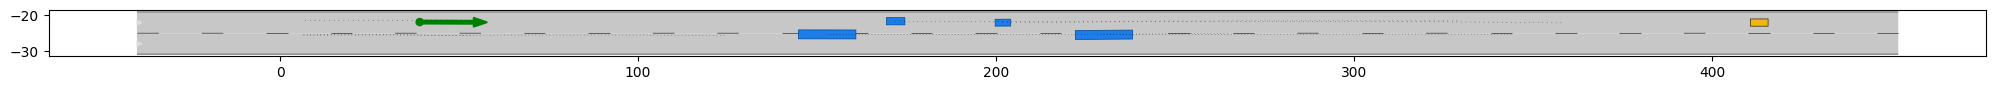

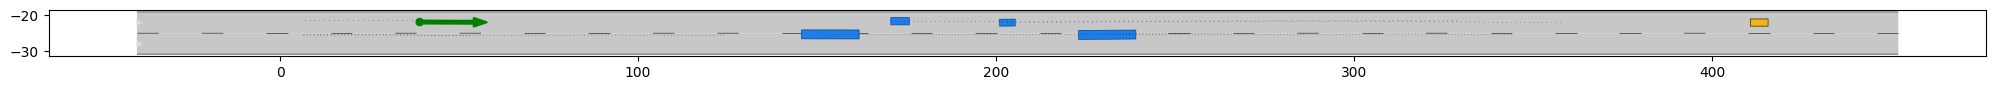

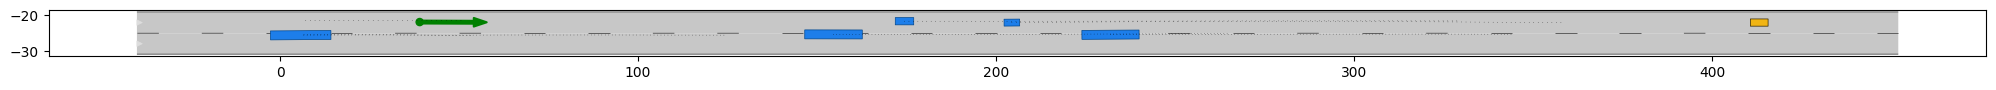

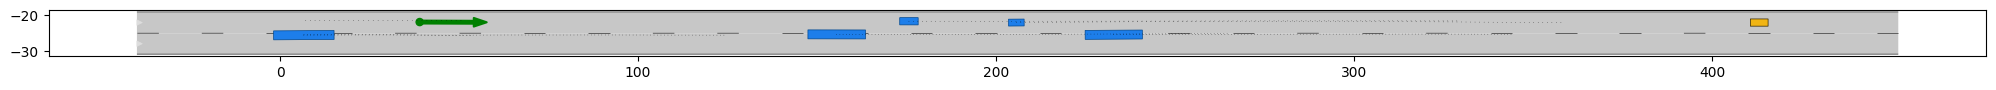

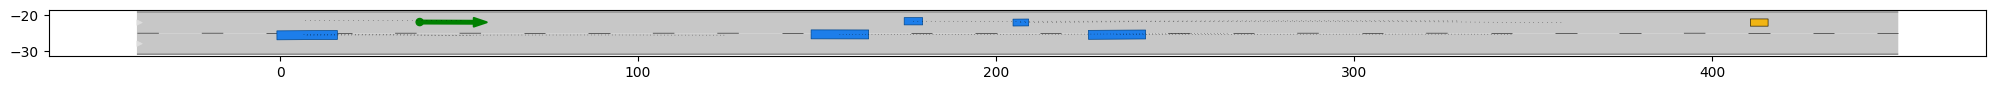

In [2]:
#%matplotlib inline

import glob
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer
from commonroad.visualization.draw_params import MPDrawParams

# generate path of the file to be opened
files = str(base_path) + "/tutorials/data/highD/xmls/*.xml"
file_path = sorted(glob.glob(files))[0]

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()
print(planning_problem_set)

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 80):

    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    # plot the scenario at different time step
    # scenario.draw(rnd, draw_params={'time_begin': i})
    draw_params = MPDrawParams()
    draw_params.time_begin = i
    scenario.draw(rnd, draw_params=draw_params)
    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()

## 5. Convert .xml files to .pickle data
Since an RL training/testing session involves tens of thousands of iterations and accesses to the scenarios, it is a good idea to convert the `.xml` files to `.pickle` format so that they will be loaded more efficiently during training and testing. For example, loading 3000 `.xml` files takes about 2h while loading the same amount of `.pickle` files takes only 10min.

Furthermore, this script separates road networks and obstacles since lots of scenario could share the road network data. Road networks are stored in `meta_scenario` folder, whereas obstacles are stored in the `problem` folder. This is done with a conversion tool in `commonroad_rl/tools/pickle_scenario`.

In [6]:
!python -m commonroad_rl.tools.pickle_scenario.xml_to_pickle -i tutorials/data/highD/xmls -o tutorials/data/highD/pickles

[gym_commonroad/__init__.py] Registered commonroad-v1
21/51
Took 38.52849817276001s


Now in the output folder `tutorials/data/highD/pickles`, there should be a `meta_scenario` folder containing meta information and a `problem` folder containing 51 `.pickle` files.

## 6. Split .pickle data for training and testing
As a final step, let's split the 51 problems into training and testing sets with a ratio of 7:3 randomly, again using a provided script in `commonroad_rl/utils_run`.

In [7]:
!python -m commonroad_rl.utils_run.split_dataset -i tutorials/data/highD/pickles/problem -otrain tutorials/data/highD/pickles/problem_train -otest tutorials/data/highD/pickles/problem_test -tr_r 0.7

Copying training data ...
Copying test data...


Now in `tutorials/data/highD/pickles`, there should be a `problem_train` folder containing 35 pickles and a `problem_test` folder containing 16 pickles.

**Note**: For each data conversion step, we provide bash script to enable converting the data on multiple threads. Please use those scripts instead if you want to convert the whole dataset to save runtime.

## 7. Separate training data for multi envs (skip this step if not using multi env)
To train the model on mulitple envs, the scenarios need to be separated into different files. we can use a provided script in `commonroad_rl/tools/pickles_scenario` to do it  
Here is an example to separate all .pickles files (both train and test) into 5 folders

In [8]:
!python -m commonroad_rl.tools.pickle_scenario.copy_files -i tutorials/data/highD/pickles/problem_train -o tutorials/data/highD/pickles/problem_train -f *.pickle -n 5 

In [9]:
!python -m commonroad_rl.tools.pickle_scenario.copy_files -i tutorials/data/highD/pickles/problem_test -o tutorials/data/highD/pickles/problem_test -f *.pickle -n 5

Now in the output folder `tutorials/data/highD/pickles/problem_train` and `tutorials/data/highD/pickles/problem_test`, you should have 5 folders name `0`,`1`,`2`,`3`,`4`, each contains different part of the scenarios.